### Задача 1. "Думский регламент"
В Тридевятом Царстве уже много лет как установилась конституционная монархия. В парламент Тридевятого царства входят 26 партий, обозначаемых строчными буквами английского алфавита от «a» до «z». Заседание парламента в соответствии с регламентом проходит по следующей схеме:
- В начале заседания никаких законопроектов на повестке дня не стоит.
- Любая партия (в том числе и та, которая внесла текущий законопроект) в любой момент времени может внести на обсуждение новый законопроект.
- При вносе партией нового законопроекта обсуждение предыдущего приостанавливается и начинается обсуждение нового. После того, как парламентарии голосуют за новый законопроект, обсуждение законопроекта, прерванного им, продолжается.
- Дискуссия по любому законопроекту обязана завершиться голосованием по этому законопроекту.
- В конце заседания не должно остаться внесённых законопроектов, дискуссия по которым не завершена.

Вам дана запись о событиях на сессии парламента. Каждое событие является либо внесением нового законопроекта, либо голосованием за какой-то законопроект, причём в обоих случаях известен номер партии, этот законопроект предложившей. События даны в том порядке, в котором они происходили. Проверьте, может ли данная запись о событиях соответствовать какому-либо заседанию, удовлетворяющему порядку проведения, описанному выше.

##### Входные данные:
Первая строка входных данных содержит одно целое число K – количество строк в записи сессии (1 ≤ K ≤ 1000). Каждая строка соответствует одному из двух событий:
- Add x – партия x внесла на голосование законопроект.
- Vote x – прошло голосование за документ, внесённый партией x.

Здесь x – строчная буква английского алфавита от «a» до «z», задающая партию.

##### Выходные данные:
Выведите «Yes», если существует корректный порядок проведения заседания, который мог привести к такой записи, и «No», если ни при каком корректном порядке проведения заседания данная запись появиться не могла.

In [1]:
def task01(events):
    stack = []
    for e in events:
        cmd, party = e.split()
        if cmd == "Add":
            stack.append(party)
        elif stack.pop() != party:
            return "No"
    return "Yes" if len(stack) == 0 else "No"

print (task01(["Add x", "Add y", "Vote y", "Vote x"]))
print (task01(["Add x", "Add x", "Vote y", "Vote x"]))
print (task01(["Add x", "Add y"]))
print (task01(["Add x", "Vote x"]))

Yes
No
No
Yes


### Задача 2. "Правильный подмногоугольник"
Задан правильный N-угольник. Требуется выбрать наименьшее количество его вершин, которые также образуют правильный многоугольник.

##### Входные данные:
Входные данные содержат одно целое число N (3 ≤ N ≤ 10^12).

##### Выходные данные:
Выведите одно число — наименьшее количество вершин заданного многоугольника, которые образуют правильный многоугольник.

In [2]:
def task02(N):
    for i in range(3, int(N**.5)+1):  #максимальное количество проверок 10^6  
        if N % i == 0: 
            return i
    if N > 4 and N % 2 == 0:
        # многоугольника из 2 вершин не существует
        # но второй множитель явно больше 2 (для N > 4), поэтому если ничего из цикла не подошло
        # то это число нам подходит
        return int(N / 2)
    return N

print (task02(3))
print (task02(8))
print (task02(9))
print (task02(10))
print (task02(11))
print (task02(16))

3
4
3
5
11
4


### Задача 3. "Определение делителя"
На форуме, на котором обсуждаются задачи олимпиад по информатике, ввели следующий аналог капчи. Участнику выдаётся строка из N десятичных цифр (без ведущих нулей). В качестве ответа требуется ввести такое основание системы счисления B, что в этой системе счисления выданная запись будет соответствовать составному числу (назовем его D), а также число X, большее 1 и меньшее D, являющееся делителем D.
При этом B и X не должны превосходить 10^9.
По заданной строке десятичных цифр найдите любую пару чисел B и X, удовлетворяющую ограничениям, или ответьте, что решения в заданных ограничениях не существует.

##### Входные данные:
Входные данные состоят из непустой строки длиной до 3*10^6 символов, составленной из цифр от 0 до 9 и не начинающейся с 0.

##### Выходные данные:
Если решение существует, выведите два числа – основание системы счисления B и делитель X, записанные в десятичной системе счисления. Оба числа должны удовлетворять ограничениям 2 ≤ B, X ≤ 10^9. Если решения не существует, выведите –1.

In [3]:
def task03(s):
    if len(s) == 1:
        res = [0,0,0,2,0,2,0,2,3][int(s)-1]
        if res:
            return 10, res
        return -1
    S = sum(map(int, s))
    if S == 1:
        return 10, 2
    return S + 1, S

print (task03('5'))
print (task03('8'))
print (task03('10'))
print (task03("19"))

-1
(10, 2)
(10, 2)
(11, 10)


### Задача 4. "Треугольник с максимальным периметром"
Массив A состоит из целых положительных чисел длин отрезков. Составьте из трех отрезков такой треугольник, чтобы его периметр был максимально возможным. Если невозможно составить треугольник с положительной площадью функция возвращает 0.
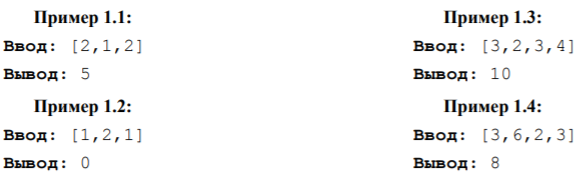
##### Ограничения:
- 3 ≤ len(A) ≤ 10000
- 1 ≤ A[i] ≤ 10^6

In [4]:
def task04(a):
    a.sort(), a.reverse()
    j = 0
    while True:
        a_1 = a[j]
        a_2 = a[j + 1]
        try:
            if a_1 + a_2 > a[j + 2] and a_2 + a[j + 2] > a_1 and a_1 + a[j + 2] > a_2:
                a_3 = a[j + 2]
                print("Максимальный периметр треугольника: ", a_1 + a_2 + a_3)
                break
        except IndexError:
            print("Невозможно найти периметр")
            break
        j+=1

In [5]:
a = [3, 3, 6, 2]
task04(a)

Максимальный периметр треугольника:  8


### Задача 5. "Максимальное число"
Дан массив неотрицательных целых чисел nums. Расположите их в таком порядке, чтобы вместе они образовали максимально возможное число.
Замечание: Результат может быть очень большим числом, поэтому представьте его как string, а не integer.
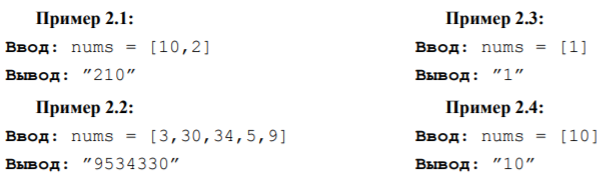
##### Ограничения:
- 1 ≤ len(nums) ≤ 100
- 0 ≤ nums[i] ≤ 10^9

In [6]:
def task05(nums):
    max_len = len(str(max(nums)))
    nums = [str(i) for i in nums]
# Функция повторяет последнюю цифру, пока число не станет таким же длинным, как самое длинное в списке
    def change_elem(s):
        return s + s[-1] * (max_len - len(s))
    sort_list = sorted(nums, key=change_elem, reverse=True)

    print(''.join(sort_list))

In [7]:
nums = [3, 30, 34, 5, 9]
task05(nums)

9534330


### Задача 6. "Сортировка диагоналей в матрице"
Дана матрица mat размером m*n, значения целочисленные. Напишите функцию, сортирующую каждую диагональ матрицы по возрастанию и возвращающую получившуюся матрицу.
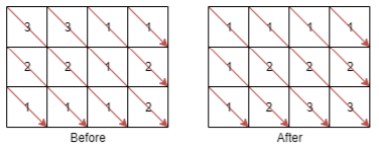
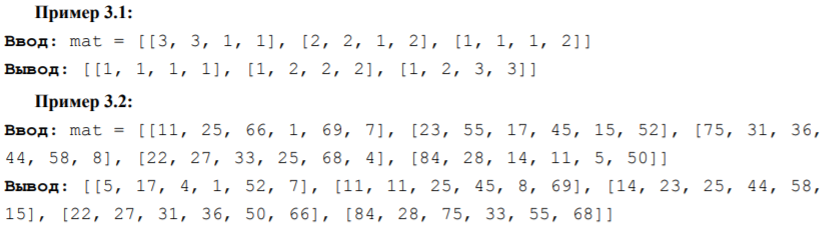
##### Ограничения:
- m == len(mat)
- n == len(mat[i])
- 1 ≤ m, n ≤ 100
- 1 ≤ mat[i][j] ≤ 100

In [8]:
def task06(mat):
    print("Исходная матрица: ")
    for row in mat:
        print(row)
    m = len(mat[0])
    n = len(mat)

    while True:
        c = 0
        for i in range(n):
            for j in range(m):
                try:
                    if mat[i][j] > mat[i + 1][j + 1]:
                        c = 1
                        mat[i][j], mat[i + 1][j + 1] = mat[i + 1][j + 1], mat[i][j]
                except:
                    continue
        if c == 0:
            break

    print("Отсортированная матрица: ")
    for row in mat:
        print(row)

In [9]:
mat = [[3, 3, 1, 1], [2, 2, 1, 2], [1, 1, 1, 2]]
# mat = [[11, 25, 66, 1, 69, 7], [23, 55, 17, 45, 15, 52], [75, 31, 36, 44, 58, 8], [22, 27, 33, 25, 68, 4], [84, 28, 14, 11, 5, 50]]
task06(mat)

Исходная матрица: 
[3, 3, 1, 1]
[2, 2, 1, 2]
[1, 1, 1, 2]
Отсортированная матрица: 
[1, 1, 1, 1]
[1, 2, 2, 2]
[1, 2, 3, 3]


### Задача 7.
Даны две строки: s1 и s2 с одинаковым размером, проверьте, может ли некоторая перестановка строки s1 “победить” некоторую перестановку строки s2 или наоборот. Строка x может “победить” строку y (обе имеют размер n), если y[i] ≤ x[i] (в алфавитном порядке) для всех i от 0 до n-1.
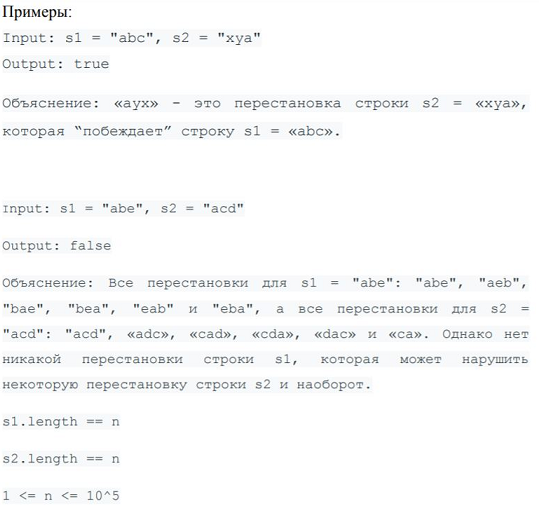

In [10]:
def problem07(str1, str2):
    sorted1 = ''.join(sorted(str1));
    sorted2 = ''.join(sorted(str2));
    firstWon = True; secondWon = True;
    
    for i in range(0, len(sorted1)):
        if not (sorted1[i] >= sorted2[i]):
            firstWon = False
            break;
    
    if not firstWon:
        for i in range(0, len(sorted1)):
            if not(sorted2[i] >= sorted1[i]):
                secondWon = False
                break;
    else: secondWon = False
    
    return (firstWon or secondWon)

In [11]:
print(problem07('abc', 'xya'))
print(problem07('abe', 'acd'))

True
False


### Задача 8.
Дана строка s, вернуть самую длинную полиндромную подстроку в s.
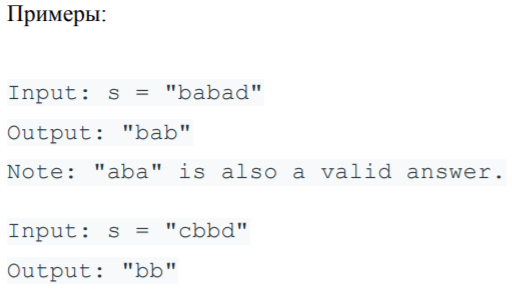

In [12]:
def isPalindrom(inStr):
    length = len(inStr)
    if length == 0 or length == 1:
        return True
    else:
        flag = True
        for i in range(0, int(length / 2)):
            if not(inStr[i] == inStr[length - (i + 1)]):
                flag = False
        return flag

In [13]:
def problem08(text):
    length = len(text)
    if (length == 0 or length == 1):
        return text
    result = text[0:1]
    
    for i in range(0, length):
        offset = 0
        if (i <= (length - (i + 1))):
            offset = i
        else:
            offset = length - (i + 1)
        
        for j in range(0, offset + 1):
            temp1 = text[i - j: 2 * j + 1]
            temp2 = text[i - j: 2 * j]
            if isPalindrom(temp1):
                if len(temp1) > len(result):
                    result = temp1
            elif isPalindrom(temp2):
                if len(temp2) > len(result):
                    result = temp2
            else: break;
    
    return result

In [14]:
print(problem08('babad'))
print(problem08('cbbd'))
print(problem08('abсba'))

bab
bb
abсba


### Задача 9.
Вернуть количество отдельных непустых подстрок текста, которые могут быть записаны как конкатенация некоторой строки с самой собой (т.е. она может быть записана, как a + a, где a - некоторая строка).
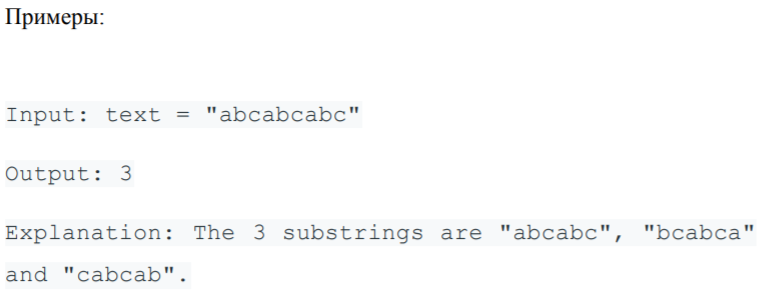

In [15]:
def problem09(text):
    length = len(text)
    result = []
    # Вытаскиваем все подстроки
    for i in range(0, length):
        for j in range(i + 1, length + 1):
            temp = text[i:j]
            # Сравниваем все части каждой подстроки, если они равны, то сохраняем их
            for i in range(0, len(temp)):
                flag = False
                if temp[0:i] == temp[i:len(temp)]:
                    result.append(temp)
                    flag = True
                if flag == True: break;
    # set удалит повторяющиеся значения, len вернёт количество элементов              
    return len(set(result))

In [16]:
print(problem09('abcabcabc'))

3
